In [1]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','23-03-2023-doubleconc-kinetics-reversibility', '')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')

In [3]:
'''
Import data from the folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
df = pd.read_csv(DATA_UV_DIR_PATH+'kinetics.csv', skiprows=1)

# Get the odd columns and even columns
odd_cols = df.iloc[:, 1::2]  # start from index 1 and select every other column

# Get number of columns
num_cols = len(odd_cols.columns)

# Create color list
colors = ['red'] + ['grey']*(num_cols-3) + ['blue']

# odd_cols.to_csv(RESULT_DIR_PATH_CSV + 'odd_cols.csv')
#df.loc[430] # For abs at 670 nm

#df.loc[430]/(1.456E-4) # For ext. cross section at 670 nm

#df.loc[700] # For abs at 400 nm
# odd_cols

In [4]:
# #================ plot data showing aggregation ===========================#

# fig = plt.figure(figsize=(4,2), dpi=600) # generate a figure

# ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# for col in odd_cols:
#     if col == 'Abs':
#         color = 'firebrick'
#     elif col == 'Abs.30':
#         color = 'royalblue'
#     else:
#         color = 'grey'
    
#     ax.plot(df.iloc[:, 0], odd_cols[col], color = color)                           # plot data    
    
# ax.set_xlim([400,1100])                    # set wavelength limit
# ax.set_ylim([0,0.7])                       # set absorbance limit
# ax.set_xlabel(r'Wavelength (nm)')          # set axis label
# ax.set_ylabel(r'Extinction ')              # set axis label
# #ax.axvline(670)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.tight_layout()  
#fig.savefig(RESULT_DIR_PATH+'auss-10ulbp-500mmnacl.pdf')

[0.63, 0.61, 0.58, 0.56, 0.54, 0.52, 0.51, 0.51, 0.49, 0.49, 0.48, 0.47, 0.47, 0.46, 0.46, 0.45, 0.45, 0.45, 0.44, 0.44, 0.44, 0.43, 0.43, 0.43, 0.42, 0.42, 0.42, 0.42, 0.41, 0.41, 0.41]
a = 0.21502167785464493
b = 0.11296356451752375
c = 0.40960253509753897


Text(1, 0.05, 'b = 0.113 min$^{-1}$')

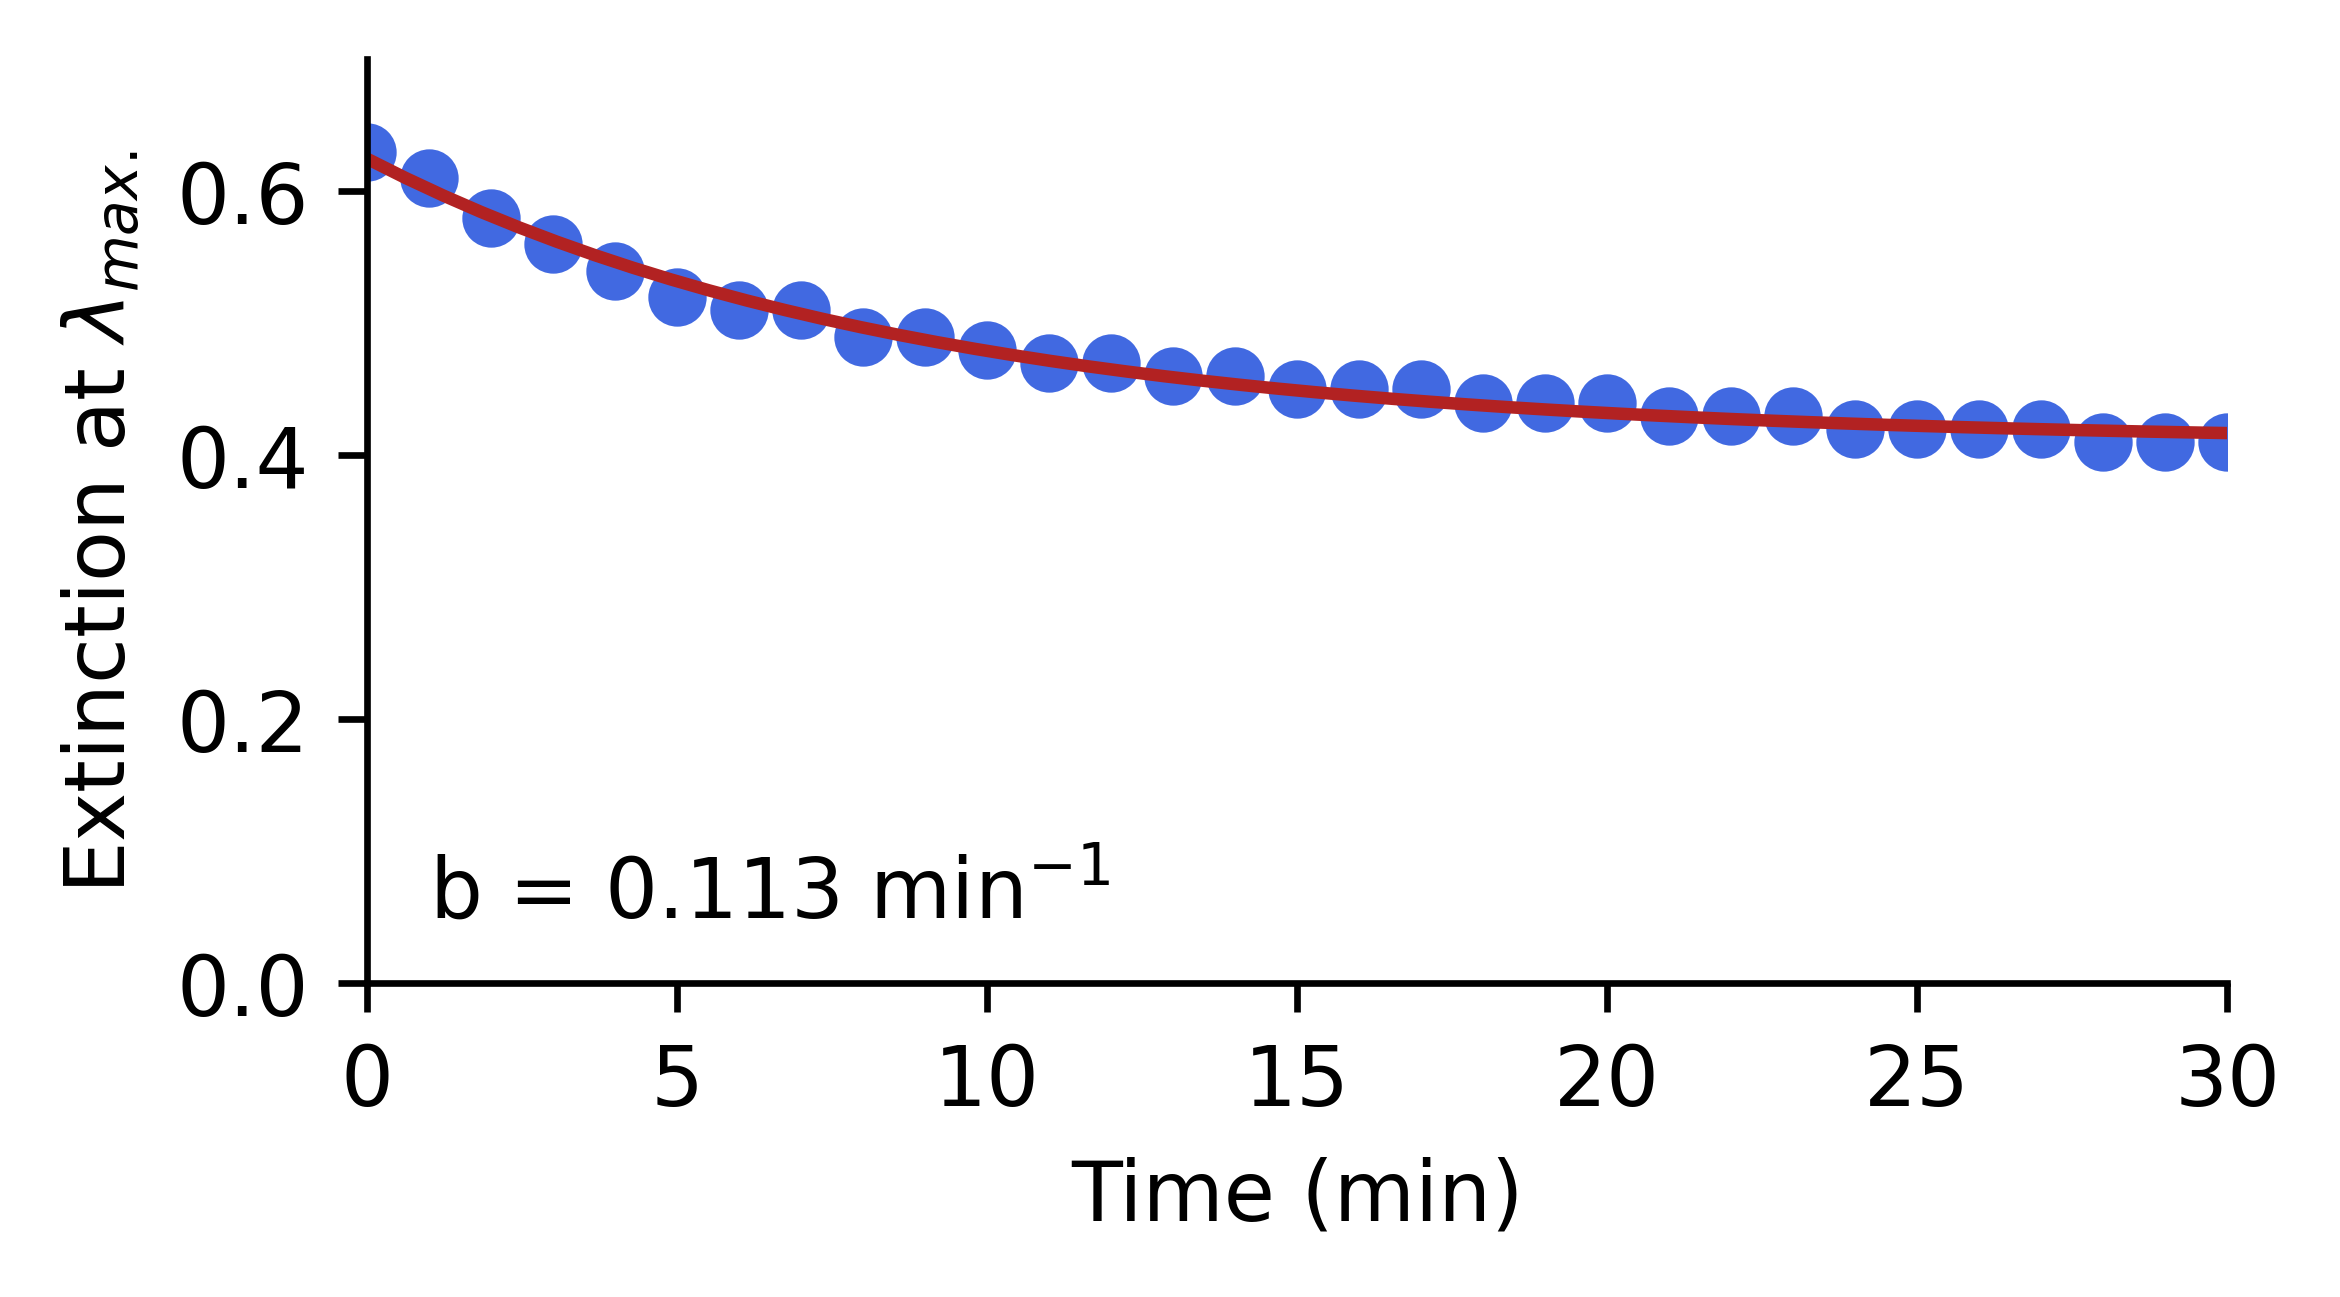

In [5]:
# Obtian the abs. max and the corresponding wavelength

max_abs = []
max_wavelength = []
times = []

for col in odd_cols:
    absorbance = round(odd_cols[col].max(),2)
    max_abs.append(absorbance)
    
print(max_abs)

for time in (range(31)):
    times.append(time)

fig_kin = plt.figure(figsize=(4,2), dpi=600) # generate a figure
ax_kin = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

ax_kin.scatter(times, max_abs, color='royalblue')                           # plot data
ax_kin.set_xlim([0,30])                    # set wavelength limit

ax_kin.set_ylim([0,0.7])                       # set absorbance limit
ax_kin.set_xlabel(r'Time (min)')          # set axis label
ax_kin.set_ylabel(r'Extinction at $\lambda_{max.}$')              # set axis label
ax_kin.spines['top'].set_visible(False)
ax_kin.spines['right'].set_visible(False)

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times, max_abs)

# Print the fitted parameters
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,30)

ax_kin.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')
ax_kin.annotate('b = 0.113 min$^{-1}$', (1,0.05))


## Plotting assembly kinetics in a single graph

a = 0.21502167785464493
Rate constant (b) = 0.11296356451752375
c = 0.40960253509753897


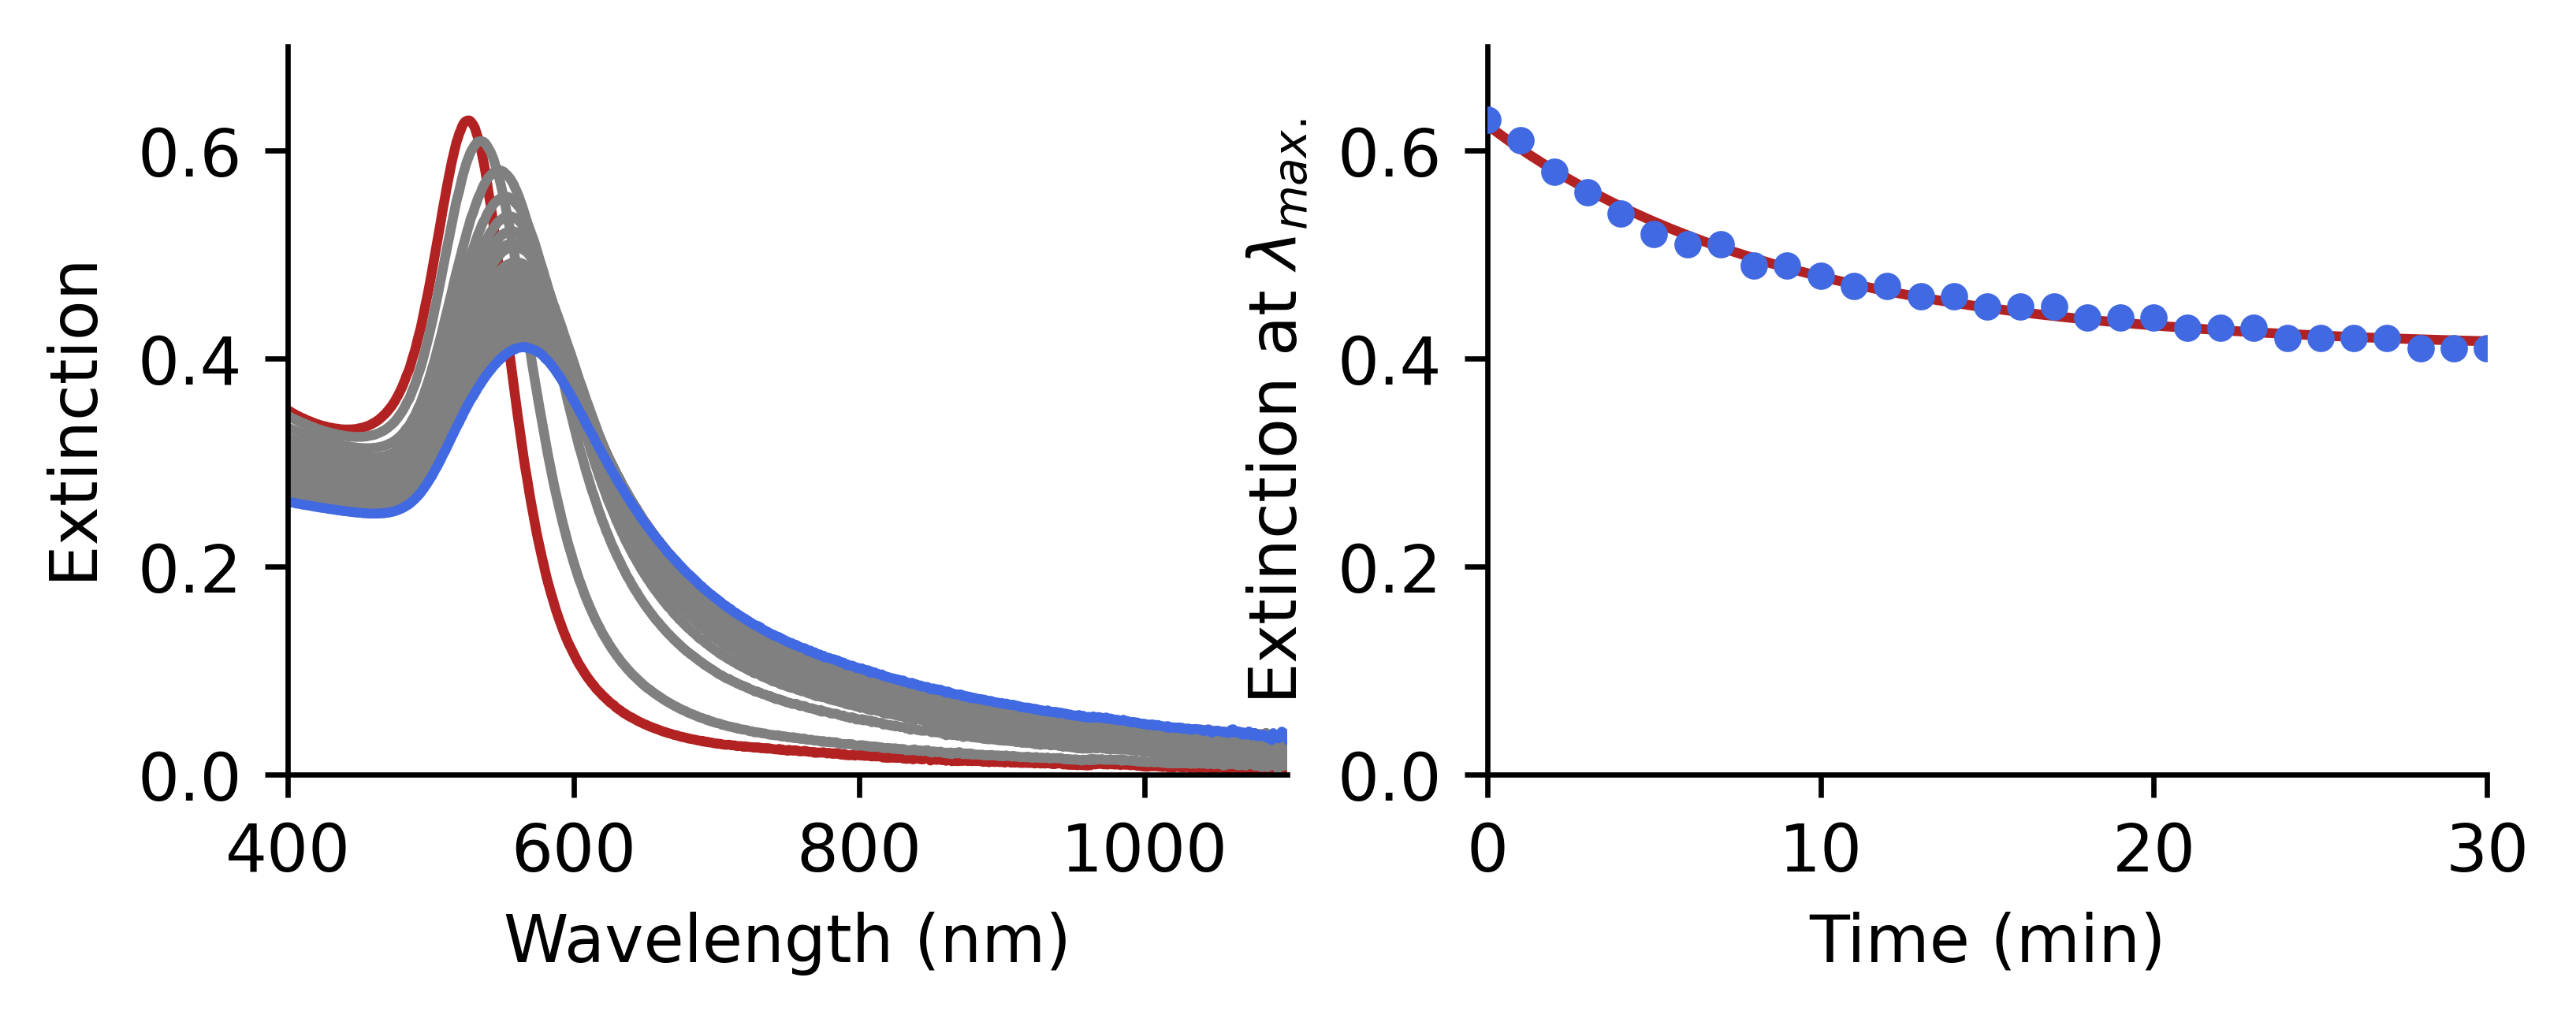

In [6]:
#================ plot data ===========================#

fig = plt.figure(figsize=(6,2), dpi=600)
gs = fig.add_gridspec(1, 2) #nrows, #ncolumns
ax1 = fig.add_subplot(gs[0, 0]) # upper left subplot
ax2 = fig.add_subplot(gs[0, 1]) # upper rigth subplot
# ax3 = fig.add_subplot(gs[1, :]) # upper rigth subplot

axes = [ax1, ax2] # list of all axes in plot

for col in odd_cols:
    if col == 'Abs':
        color = 'firebrick'
    elif col == 'Abs.30':
        color = 'royalblue'
    else:
        color = 'grey'
    
    ax1.plot(df.iloc[:, 0], odd_cols[col], color = color)                           # plot data    
    
ax1.set_xlim([400,1100])                    # set wavelength limit
ax1.set_ylim([0,0.7])                       # set absorbance limit
ax1.set_xlabel(r'Wavelength (nm)')          # set axis label
ax1.set_ylabel(r'Extinction ')              # set axis label
ax1.spines['right'].set_visible(False)      # remove spines
ax1.spines['top'].set_visible(False)        # remove spines


#=======second plot======================#

ax2.scatter(times, max_abs, color='royalblue', s=10, zorder=5)                           # plot data
ax2.set_xlim([0,30])                    # set wavelength limit

ax2.set_ylim([0,0.7])                       # set absorbance limit
ax2.set_xlabel(r'Time (min)')          # set axis label
ax2.set_ylabel(r'Extinction at $\lambda_{max.}$')              # set axis label
ax2.spines['right'].set_visible(False)      # remove spines
ax2.spines['top'].set_visible(False)        # remove spines

#========exponential fit===============#

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, times, max_abs)

# Print the fitted parameters
print('a =', popt[0])
print('Rate constant (b) =', popt[1])
print('c =', popt[2])
x_data = np.linspace(0,30)

ax2.plot(x_data, exp_decay(x_data, popt[0], popt[1], popt[2]), color='firebrick')

#================third plot=================#

# ax3.plot(df_cycles[0], df_cycles[1], color='firebrick', marker='o', mfc='black', mec='black')                           # plot data
# ax3.set_xlim([-0.1,10.1])                    # set wavelength limit
# ax3.set_ylim([0.45,0.65])                       # set absorbance limit
# ax3.set_xlabel(r'Cycles')          # set axis label
# ax3.set_ylabel(r'Extinction at $\lambda_{max.}$')              # set axis label
# ax3.spines['right'].set_visible(False)      # remove spines
# ax3.spines['top'].set_visible(False)        # remove spines

# plt.tight_layout()  

fig.savefig(RESULT_DIR_PATH+'Fig_S4_top.jpeg')